In [1]:
import qiskit
import numpy as np
from math import pi
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, thermal_relaxation_error, pauli_error

In [3]:
q = QuantumRegister(4, 'q')
c = ClassicalRegister(2, 'c')
circ = QuantumCircuit(q, c)
circ.u(pi/2,0,pi,q[1])
circ.cx(q[0],q[1])
circ.p(-pi/4, q[1])
circ.cx(q[1],q[2])
circ.cx(q[2],q[1])
circ.cx(q[1],q[2])
circ.cx(q[0],q[1])
circ.cx(q[1],q[0])
circ.cx(q[0],q[1])
circ.u(pi/2,0,pi, q[3])
circ.cx(q[3],q[2])
circ.p(pi/4, q[2])
circ.cx(q[1],q[2])
circ.p(pi/4, q[1])
circ.p(-pi/4, q[2])
circ.cx(q[3],q[2])
circ.cx(q[1],q[2])
circ.cx(q[2],q[1])
circ.cx(q[1],q[2])
circ.u(pi/2,0,5*pi/4, q[1])
circ.cx(q[3],q[2])
circ.p(-pi/4, q[2])
circ.p(pi/4, q[3])
circ.barrier()
circ.u(pi,0,pi, q[3])
circ.cx(q[3],q[2])
circ.cx(q[2],q[3])
circ.cx(q[3],q[2])
circ.cx(q[2],q[3])
circ.cx(q[2],q[1])
circ.u(pi/2,0,pi, q[1])
circ.cx(q[2],q[3])
circ.cx(q[3],q[2])
circ.cx(q[2],q[3])
circ.cx(q[2],q[1])
circ.p(-pi/4, q[1])
circ.cx(q[1],q[2])
circ.cx(q[2],q[1])
circ.cx(q[1],q[2])
circ.cx(q[3],q[2])
circ.p(pi/4, q[2])
circ.cx(q[1],q[2])
circ.p(pi/4, q[1])
circ.p(-pi/4, q[2])
circ.cx(q[3],q[2])
circ.cx(q[2],q[3])
circ.cx(q[3],q[2])
circ.cx(q[2],q[3])
circ.cx(q[2],q[1])
circ.p(-pi/4, q[1])
circ.p(pi/4, q[2])
circ.cx(q[2],q[1])
circ.u(pi/2,0,5*pi/4, q[3])
circ.cx(q[2],q[3])
circ.u(pi,0,pi, q[2])
circ.barrier()
circ.measure(q[1], c[0])
circ.measure(q[3], c[1])

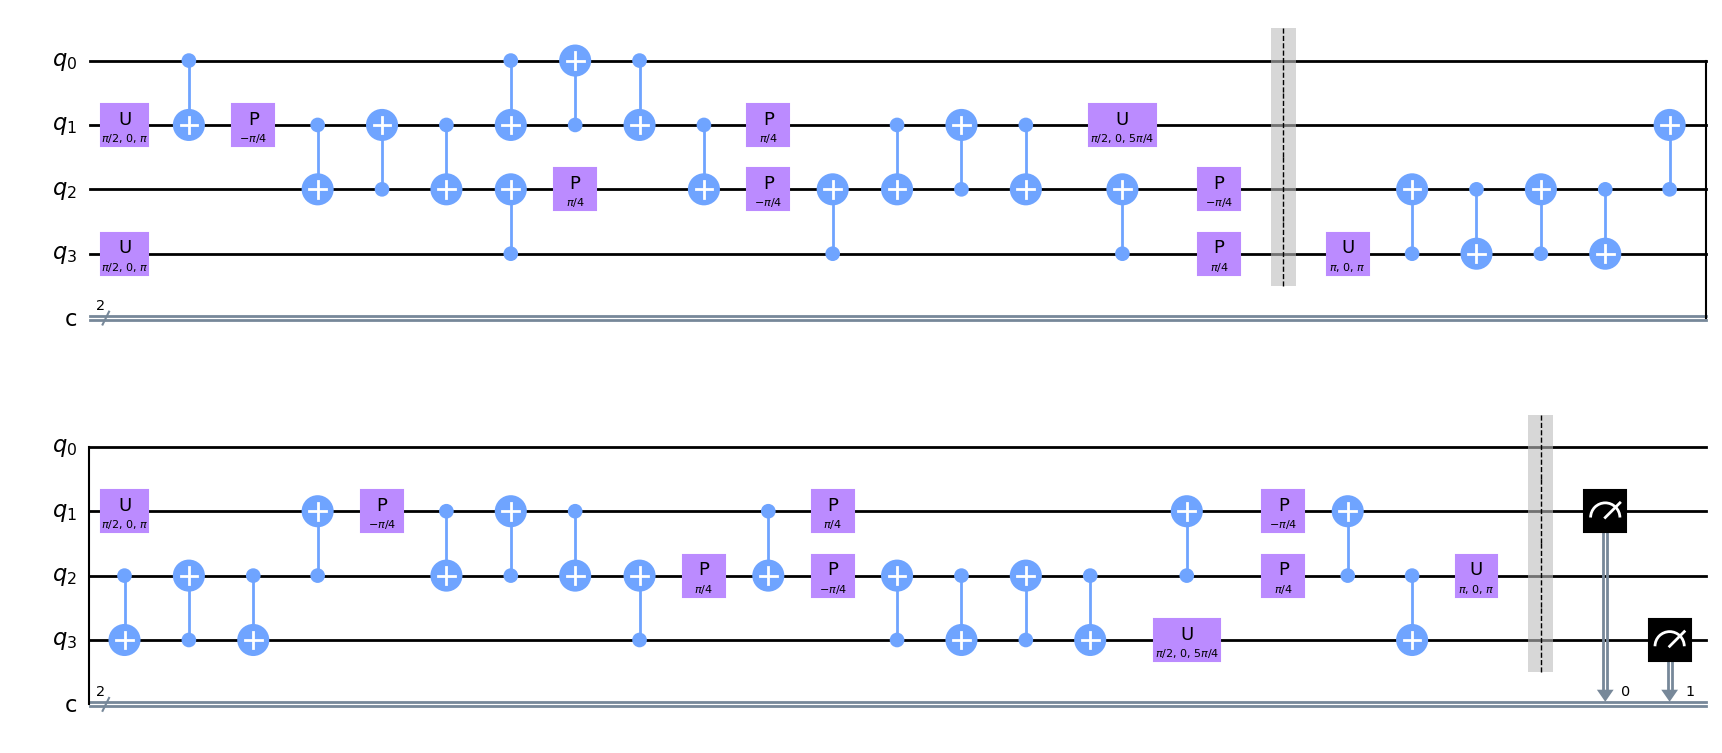

In [4]:
circ.draw('mpl')

In [66]:
noisemodel = NoiseModel()
p_error = 0.5
oneq_dn = depolarizing_error(p_error,1)
twoq_dn = depolarizing_error(p_error,2)
#thermal and relaxation error
#readout error
noisemodel.add_all_qubit_quantum_error(oneq_dn,['p','u'])
noisemodel.add_all_qubit_quantum_error(twoq_dn,['cx'])
print(noisemodel)

NoiseModel:
  Basis gates: ['cx', 'id', 'p', 'rz', 'sx', 'u']
  Instructions with noise: ['u', 'cx', 'p']
  All-qubits errors: ['p', 'u', 'cx']


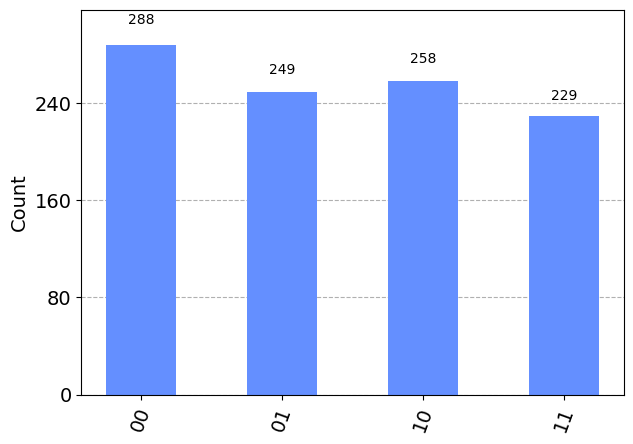

In [67]:
sim = AerSimulator(noise_model = noisemodel)
t_circ = transpile(circ)
result = sim.run(t_circ).result()
counts = result.get_counts()
plot_histogram(counts)

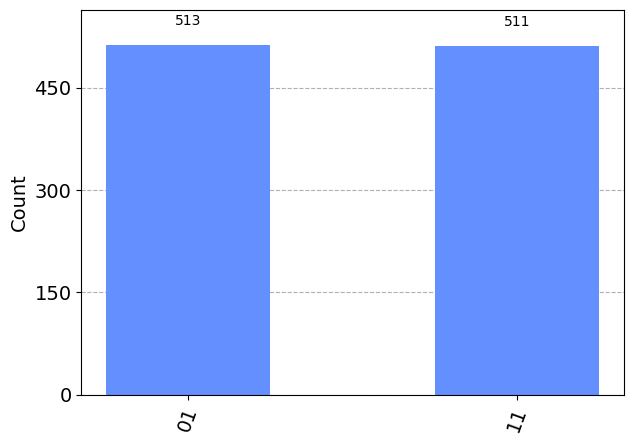

In [68]:
job = execute(circ,Aer.get_backend('qasm_simulator'))
actualcounts = job.result().get_counts()
plot_histogram(actualcounts)

In [70]:
from qiskit.quantum_info import hellinger_distance
hellinger_distance(actualcounts,counts)

0.5629481429789169